0
10
20
30
40
50
60
70
80
90


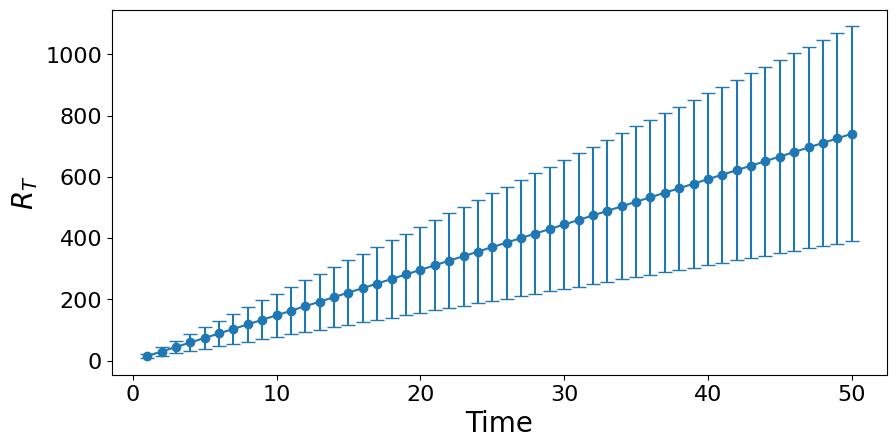

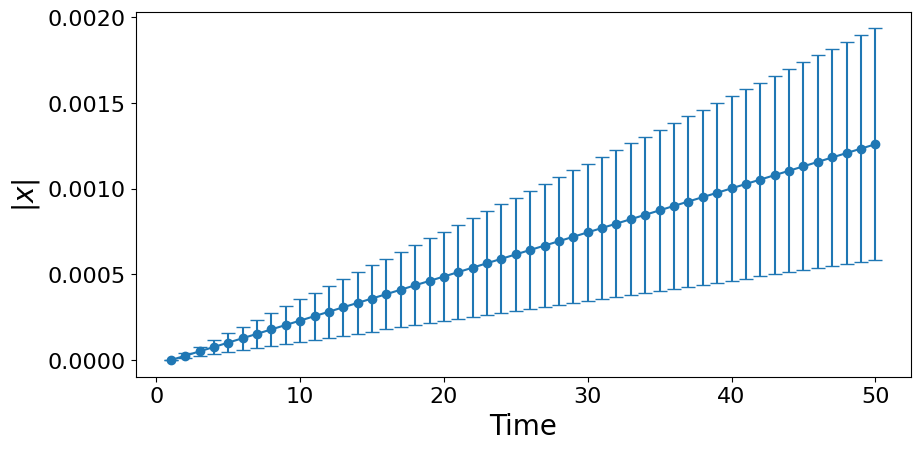

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

import objective
import method
import utils

# parameter setting
itr_num = 100 # number of random seeds
alg_num = 1 # 0: GD, 1: ONS, 2: Con-OGD, 3: Con-ONS, 4: MetaGrad
experiment_num = 2 # 0: Contaminated Strongly Convex, 1: Contaminated EC, 2: Least Mean Square Regression

# parameters for experiments 0 and 1
if experiment_num == 0 or experiment_num == 1:
    n = 1 # fixed
    d = 1 # fixed
    T = 1000 # number of rounds
    k = 250 # number of contaminated rounds

# parameters for experiment 2
elif experiment_num == 2:
    n = 10 # batch size
    d = 5 # dimension of the problem
    T = 1000 # number of rounds
    k = 250 # number of contaminated rounds



experiment_list = ['ConSC_100', 'ConEC_100', 'LR']
alg_name = ['GD', 'ONS', 'Con-OGD', 'Con-ONS', 'MetaGrad']

regret_array = [] # regret data
x_array = [] # x data

# main loop
for itr in range(itr_num):
    random.seed(itr)    
    if itr%10==0:
        print(itr)
        
    # generate data
    a = []
    b = []
    w = np.array([random.random() for i in range(d)]) # 最適解
    for t in range(T):
        a_t = np.zeros((n,d))
        b_t = np.zeros(n)
        for i in range(n):
            for j in range(d):
                a_t[i][j] = 1.0 + random.random()
            b_t[i] = w.dot(a_t[i,:])
        a.append(a_t)
        b.append(b_t)
    
    # set objective function
    if experiment_num == 0:
        obj = objective.ContaminatedStronglyConvex(T, k, itr)
    elif experiment_num == 1:
        obj = objective.ContaminatedExpConcave(T, k, itr)
    elif experiment_num == 2:
        obj = objective.LinearRegression(a, b, d, n, T, w)
    
    # initial point
    x0 = np.zeros(d)

    # set method and implement
    met = method.Method(obj, T, x0, d)
    alg_list = [met.GradientDescent, met.OnlineNewton, met.ContaminatedOGD, met.ContaminatedONS, met.MetaGrad]
    regret_data, x_data = alg_list[alg_num](k)

    # store data
    regret_array.append(regret_data)
    x_array.append(x_data)



# calculate mean and standard deviation
regret_2d_array = np.vstack(regret_array)
x_2d_array = np.vstack(x_array)
regret_mean = np.mean(regret_2d_array, axis=0)
regret_std = np.std(regret_2d_array, axis=0)
x_mean = np.mean(x_2d_array, axis=0)
x_std = np.std(x_2d_array, axis=0)

# save data
filename = f'{alg_name[alg_num]}_{n}_{T}_{d}_{k}.npz'
save_data = {'regret_mean': regret_mean, 'regret_std': regret_std, 'x_mean': x_mean, 'x_std': x_std} 
folder_name = experiment_list[experiment_num]
utils.save_experiment_results(folder_name, filename, **save_data)


# plot
time = np.arange(1, T + 1)
fig1, ax1 = plt.subplots(figsize=(10, 5))
fig2, ax2 = plt.subplots(figsize=(10, 5))
ax1.errorbar(time, regret_mean, yerr=regret_std, fmt='o-', capsize=5)
ax2.errorbar(time, x_mean, yerr=x_std, fmt='o-', capsize=5)
ax1.set_xlabel('Time', fontsize=20)
ax2.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('$R_T$', fontsize=20)
ax2.set_ylabel('$\|x\|$', fontsize=20)
# ax1.set_ylim([-50,200])
# ax2.set_ylim([0,2.5])
ax1.tick_params(axis='both', labelsize=16) 
ax2.tick_params(axis='both', labelsize=16) 
fig1.subplots_adjust(bottom=0.15)
fig2.subplots_adjust(bottom=0.15)

plt.show()